In [1]:
import pandas as pd
import numpy as np


In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing Individual Feature Patterns using Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. 

In [5]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

#### Continuous numerical variables

A great way to visualzie continuous numerical variables is by using __scatter plots__

__Regplot__ its a good visualization to understand the (linear) relatioship between an individual feature and the target. Plots the scatterplot puls the fitted regression line for the data

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


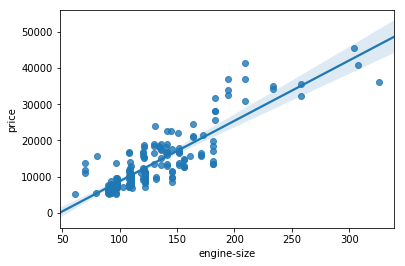

In [10]:
sns.regplot(x="engine-size", y="price", data=df);
df[['engine-size', 'price']].corr()

As the engine-size goes up, the price goes up - this indicates a __positive direct correlation__ between these two variable. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line!

We can see that the correlation between 'engine-size' and 'price' is approximately 0.87

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


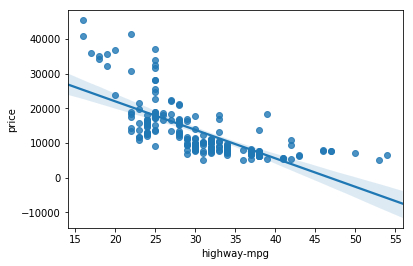

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)

df[['highway-mpg', 'price']].corr()

As the highway-mpg goes up, the price goes down: this indicates an __inverse/negative relationship__ between these two variables. Highway mpg could potentially be a predictor of price.

The correlation is approximately -0.704

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


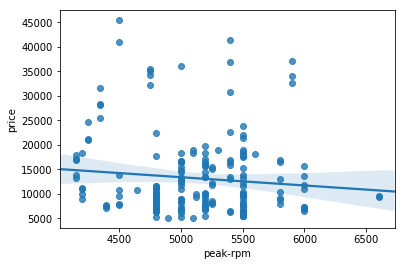

In [15]:
''' EXAMPLE OF A WEAK LINEAR RELATIONSHIP '''
sns.regplot(x="peak-rpm", y="price", data=df);
df[['peak-rpm','price']].corr()

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

#### Categorical variables

A good way to visualize categorical variables is by using boxplots.

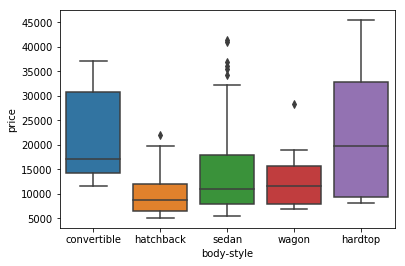

In [17]:
sns.boxplot(x="body-style", y="price", data=df);

   We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price

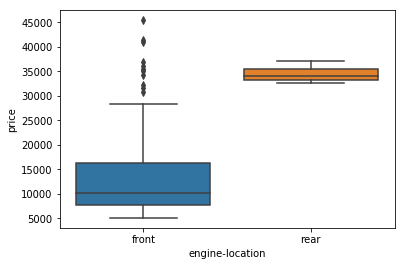

In [18]:
sns.boxplot(x="engine-location", y="price", data=df);

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

## Descriptive Statistical Analysis

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
df.describe(include=np.object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [22]:
df['engine-location'].value_counts().to_frame()


,engine-location
front,198
rear,3


Examining the value counts of the engine location would notbe a good predictor variable for price. This is because we only have three cars with a rear engine and 198 with an engine in the front, __this result is skewed__.

## Basic of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups

If we want to know, on average, which type of drive wheel is most valuable:

In [26]:
df[['drive-wheels', 'price']].groupby('drive-wheels', as_index=False).mean()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

*Its also possible to group multiple variables*

In [29]:
df_group_one = df[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when its made into a __pivot table__.
A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row.

In [33]:
grouped_pivot = df_group_one.pivot(index='drive-wheels', columns='body-style').fillna(0)
grouped_pivot 

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

##### Visualize the realtionship between two categorical and one numerical variable - heatmap

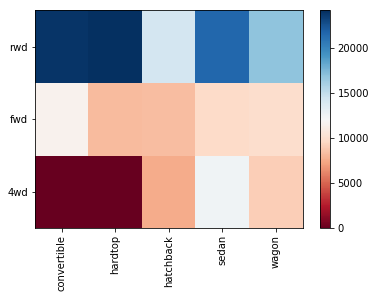

In [34]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

## Correlation

The resulting coefficient is a value between -1 and 1 inclusive, where:

    1: Total positive linear correlation.
    0: No linear correlation, the two variables most likely do not affect each other.
    -1: Total negative linear correlatio
The P-value is the probability value that the correlation between these two variables is statistically significant. By convention, when the:
    - p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
    - the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
    - the p-value is  <  0.1: there is weak evidence that the correlation is significant.
    - the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [35]:
from scipy import stats

In [36]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [37]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


Since the p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.